In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys  
sys.path.insert(1, '/home/marguerite/Documents/lab/TrajoptMPCReference')
import overloading

In [2]:
colors = sns.color_palette("viridis")


In [3]:
def to_array(element):
    if isinstance(element, float):
        return element
    elif isinstance(element, np.ndarray):
        return element
    elif isinstance(element, overloading.matrix_):
        return np.asarray(element)
    
    

In [4]:
N=10 # for 33 columns in csv
File_col=[f'File_{i}'for i in range(N)]
func_col= [f'func_{i}'for i in range(N)]
line_col= [f'line_{i}'for i in range(N)]

col_names=['Operator', 'Op1', 'Op2'] + File_col +func_col + line_col + ['QP Iteration', 'Soft Iteration']
ordered_by_step=['Operator', 'Op1', 'Op2' ,'QP Iteration', 'Soft Iteration'] + np.concatenate([[f'File_{i}', f'func_{i}',f'line_{i}'] for i in range(N)]).tolist()

new_op = pd.read_pickle('./data/urdf/op5.plk')
new_op.columns = col_names
new_op=new_op[ordered_by_step]
new_op['Op1']=new_op['Op1'].apply(lambda x: np.asarray(x))
new_op['Op2']=new_op['Op2'].apply(to_array)
display(new_op)


,Operator,Op1,Op2,QP Iteration,Soft Iteration,File_0,func_0,line_0,File_1,func_1,...,line_6,File_7,func_7,line_7,File_8,func_8,line_8,File_9,func_9,line_9
0,mul,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], ...",0,0,RBDReference.py,end_effector_positions,132,TrajoptCost.py,delta_x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mul,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], ...",0,0,RBDReference.py,end_effector_positions,132,TrajoptCost.py,delta_x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mul,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], [...","[[[[[0]]]], [[[[1]]]], [[[[0]]]], [[[[1]]]]]",0,0,RBDReference.py,end_effector_positions,133,TrajoptCost.py,delta_x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mul,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[-0.0, -1.0, 0.0, 0.0], [1.0, -0.0, 0.0, 0.0]...",0,0,RBDReference.py,Jacobian,358,TrajoptCost.py,compute_J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mul,"[[0.0, -1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], ...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], ...",0,0,RBDReference.py,Jacobian,358,TrajoptCost.py,compute_J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20473,transpose,"[0.08137564947743448, 0.06505657639502815, 0.0...",None,3,0,TrajoptCost.py,gradient,440,TrajoptMPCReference.py,SQP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20474,mul,"[0.08137564947743448, 0.06505657639502815, 0.0...","[[100.0, 0.0, 0.0, 0.0], [0.0, 100.0, 0.0, 0.0...",3,0,TrajoptCost.py,gradient,440,TrajoptMPCReference.py,SQP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20475,mul,"[8.137564947743448, 6.505657639502815, 1.11381...","[[-1.5650565763950282, -0.569753575389212, 0.0...",3,0,TrajoptCost.py,gradient,440,TrajoptMPCReference.py,SQP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20476,reshape,"[-18.71628283973491, -9.983737734134776, -1.91...",None,3,0,TrajoptCost.py,gradient,440,TrajoptMPCReference.py,SQP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#number of functions recorded in history for each operation
#N=7 # for 24 columns in csv
#N=9 # for 30 colums in csv
N=10 # for 33 columns in csv
File_col=[f'File_{i}'for i in range(N)]
func_col= [f'func_{i}'for i in range(N)]
line_col= [f'line_{i}'for i in range(N)]

col_names=['Operator', 'Op1', 'Op2'] + File_col +func_col + line_col + ['QP Iteration', 'Soft Iteration']
ordered_by_step=['Operator', 'Op1', 'Op2'] + np.concatenate([[f'File_{i}', f'func_{i}',f'line_{i}'] for i in range(N)]).tolist()
reversed_ordered_by_step=['Operator', 'Op1', 'Op2'] + np.concatenate([[f'File_{i}', f'func_{i}',f'line_{i}'] for i in range(N-1, -1, -1)]).tolist()
ordered_by_type=['Operator', 'Op1', 'Op2'] + [f'File_{i}'for i in range(N-1, -1, -1)] +[f'func_{i}'for i in range(N-1, -1, -1)]+[f'line_{i}'for i in range(N-1, -1, -1)]
op = pd.read_csv('./data/urdf/op4.csv', sep=",",header=None, names=col_names)
op=op[ordered_by_step]
op[line_col]=op[line_col].fillna(0).astype(int) # cast line number as ints (0 means empty cell)



In [5]:
def filter_by_filename(df,name):
    return df[df[File_col].isin([name]).any(axis=1)]

def filter_by_function(df,name):
    return df[df[func_col].isin([name]).any(axis=1)]

def filter_by_line(df,lineno):
    return df[df['func_0']==lineno]

def filter_col(df,col,name):
    return df[df[col].isin([name]).any(axis=1)]


def filter_out_by_index(df,indexes,multiple=False):
    if multiple:
        list_indexes = [idx for sublist in indexes for idx in sublist]
        # list_indexes=[list(index) for index in indexes].flatten()
        return df[~df.index.isin(list_indexes)]
    else:
        return df[~df.index.isin(list(indexes))]

   

def unique_filenames(df):
    unique_file_prev=list(op['File_0'].unique())
    for col in File_col:
        unique_file= [file for file in op[col].unique() if (file not in unique_file_prev)] + unique_file_prev
        unique_file_prev=unique_file
    return unique_file

def unique_functions(df):
    unique_func_prev=list(op['func_0'].unique())
    for col in func_col:
        unique_func= [func for func in op[col].unique() if (func not in unique_func_prev) and func is not None] + unique_func_prev
        unique_func_prev=unique_func
    return unique_func

No operations are being measurement in URDF parser (operations to create the Xmat, S, Imat matrices ...)

## Classify operations : Dynamics vs Optimization

In [7]:

cost_op =filter_by_filename(new_op,'TrajoptCost.py')
sqp_op = filter_by_filename(new_op,'TrajoptMPCReference.py')
dynamics_op = filter_by_filename(new_op,'TrajoptPlant.py')

print('Total number of operations: ', new_op.shape[0])
print('SQP operations: ',sqp_op.shape[0])
print('Cost operations: ', cost_op.shape[0])
print('Dynamics operations: ', dynamics_op.shape[0])



Total number of operations:  20478
SQP operations:  20478
Cost operations:  6660
Dynamics operations:  12429


In [8]:
def first_call(df):
    last_functions=[]
    last_lines=[]

    for index,row in df.iterrows():
        for i in range(N):  
          if(row[f'line_{i}']==0):
             last_functions.append(row[f'func_{i-1}'])
             last_lines.append(row[f'line_{i-1}'])
             break

    return last_functions,last_lines


Not important => post optimization operations  
Keep only operations made from SQP

In [9]:
new_op=sqp_op

In [71]:
# remaining_ops = op[~op.index.isin(list(cost_op.index) + list(dynamics_op.index))]
non_classified_ops = filter_out_by_index(new_op,[cost_op.index,dynamics_op.index] ,multiple=True)
# print(f'There are {remaining_ops.shape[0]} unclassified rows (Not in Cost, not in Plant, intern to SQP)')
print(f'There are {non_classified_ops.shape[0]} unclassified rows (Not in Cost, not in Plant, intern to SQP)')


There are 1389 unclassified rows (Not in Cost, not in Plant, intern to SQP)


### Proportion of operations made in TrajoptCost, TrajoptPlant and other  
(later will add TrajoptConstraints)

/tmp/ipykernel_15611/3761048392.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=proportions, palette=colors)
/tmp/ipykernel_15611/3761048392.py:8: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=class_labels, y=proportions, palette=colors)


Text(0.5, 1.0, 'Proportion of Operations (in %)')

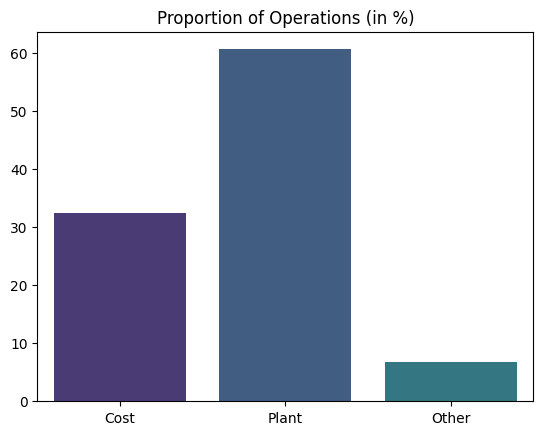

In [72]:
class_labels=['Cost','Plant','Other']
n_tot=sqp_op.shape[0]
prop_cost=(cost_op.shape[0]/n_tot)*100
prop_plant=(dynamics_op.shape[0]/n_tot)*100
prop_other=((n_tot-(cost_op.shape[0]+dynamics_op.shape[0]))/n_tot)*100

proportions=[prop_cost,prop_plant,prop_other]
sns.barplot(x=class_labels, y=proportions, palette=colors)
plt.title('Proportion of Operations (in %)')

#### Cost Value, gradient and Hessian

/tmp/ipykernel_15611/1163342886.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos , y=proportions, width= width, palette=colors, ax=ax, label='Proportion')
/tmp/ipykernel_15611/1163342886.py:16: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=x_pos , y=proportions, width= width, palette=colors, ax=ax, label='Proportion')


[Text(0, 0, 'Value'), Text(1, 0, 'Gradient'), Text(2, 0, 'Hessian')]

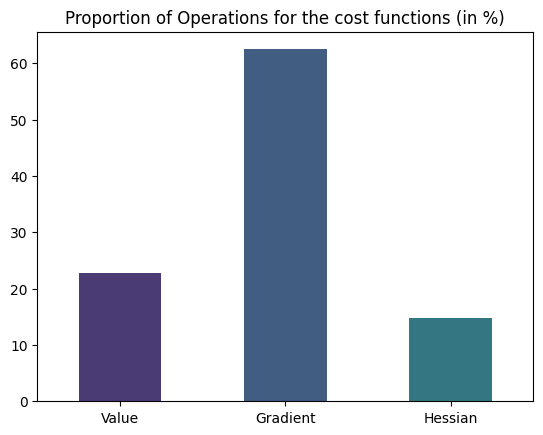

In [73]:
cost_value_op = cost_op[cost_op[func_col].isin(['value']).any(axis=1)]
cost_grad_op = cost_op[cost_op[func_col].isin(['gradient']).any(axis=1)]
cost_hess_op = cost_op[cost_op[func_col].isin(['hessian']).any(axis=1)]

prop_value = (cost_value_op.shape[0]/cost_op.shape[0])*100 
prop_grad = (cost_grad_op.shape[0]/cost_op.shape[0])*100
prop_hess = (cost_hess_op.shape[0]/cost_op.shape[0])*100 
x_labels = ['Value', 'Gradient', 'Hessian']
proportions = [prop_value,prop_grad,prop_hess]
counts = [cost_value_op.shape[0],cost_grad_op.shape[0],cost_hess_op.shape[0]]


fig, ax = plt.subplots()
width = 0.5
x_pos = np.arange(len(x_labels))
sns.barplot(x=x_pos , y=proportions, width= width, palette=colors, ax=ax, label='Proportion')
# sns.barplot(x=x_pos , y=counts, width= width/2, palette=colors, ax=ax, label='Counts')
plt.title('Proportion of Operations for the cost functions (in %)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)


TODO Compare to number of times called  
consecutives rows with value = 1 call of value

In [74]:
def n_function_calls(df,name):
    call_started=[False]*N
    call_ended=[0]*N
    for i, row in df.iterrows():
        last_row= (i==df.shape[0]-1)
        for j,col in enumerate(func_col):
            if(row[col]==name):
                call_started[j]=True
                if last_row: call_ended[j] += 1 
            else:
                if call_started[j]: call_ended[j] += 1  
                call_started[j]=False
    return int(sum(call_ended))


/tmp/ipykernel_15611/1817789979.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos , y=op_per_call, width= width, palette=colors, ax=ax, label='Proportion')
/tmp/ipykernel_15611/1817789979.py:15: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=x_pos , y=op_per_call, width= width, palette=colors, ax=ax, label='Proportion')


[Text(0, 0, 'Value'), Text(1, 0, 'Gradient'), Text(2, 0, 'Hessian')]

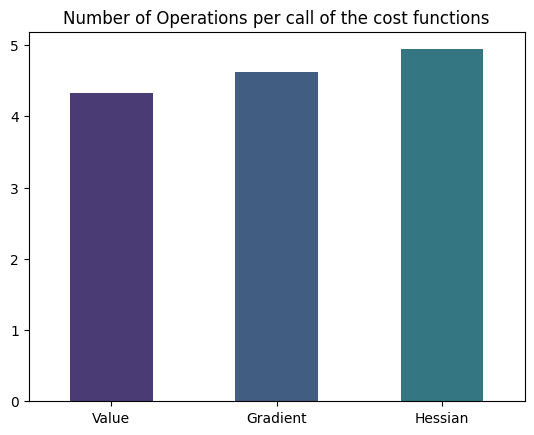

In [75]:
n_calls_value= n_function_calls(cost_op,'value')
n_calls_gradient= n_function_calls(cost_op,'gradient')
n_calls_hessian=  n_function_calls(cost_op,'hessian')

cost_value_n_op = cost_op[cost_op[func_col].isin(['value']).any(axis=1)].shape[0]
cost_grad_n_op = cost_op[cost_op[func_col].isin(['gradient']).any(axis=1)].shape[0]
cost_hess_n_op = cost_op[cost_op[func_col].isin(['hessian']).any(axis=1)].shape[0]

x_labels = ['Value', 'Gradient', 'Hessian']
op_per_call = [cost_value_n_op/n_calls_value,cost_grad_n_op/n_calls_gradient,cost_hess_n_op/n_calls_hessian]

fig, ax = plt.subplots()
width = 0.5
x_pos = np.arange(len(x_labels))
sns.barplot(x=x_pos , y=op_per_call, width= width, palette=colors, ax=ax, label='Proportion')
plt.title('Number of Operations per call of the cost functions')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)


### Analyze size of operands

In [10]:
new_op['Shape1']= new_op['Op1'].apply(lambda x: np.shape(x))
new_op['Shape2']= new_op['Op2'].apply(lambda x: np.shape(x))

In [77]:
hess=filter_by_function(new_op,'hessian')
print("In hessian operations, size of :\n \t- the first operand : ", hess['Shape1'].unique())
print("\t- the second operand : ", hess['Shape2'].unique())


In hessian operations, size of :
 	- the first operand :  [(4, 4) (3, 1) (4, 2) (4,) (2, 2) (2, 4) (4, 6)]
	- the second operand :  [(4, 4) (4, 1) (3, 1) (2,) () (2, 2) (2, 4) (4, 2) (2, 6)]


In [78]:
def unique_from_set_of_col(df, col_set):
    unique_prev=[]
    unique=[]

    for col in col_set:
        try:
            unique= [element for element in op[col].unique() if (element not in unique_prev)] + unique_prev
            unique_prev=unique
        except:
            next

    return unique
    

Create a mapping () => (1,1) ,  (n,)=>(6,1)

In [11]:

new_op['Shape1']=new_op['Shape1'].apply(lambda x: (x[0],1) if len(x)==1 else (1,1) if len(x)==0 else x)
new_op['Shape2']=new_op['Shape1'].apply(lambda x: (x[0],1) if len(x)==1 else (1,1) if len(x)==0 else x)
print(new_op['Shape1'].unique())

[(4, 4) (3, 1) (2, 2) (2, 1) (4, 1) (1, 1) (6, 6) (6, 1) (36, 1) (4, 2)
 (2, 4) (4, 6) (6, 2) (2, 6) (58, 58) (40, 58) (40, 40) (40, 1) (1, 40)
 (58, 40) (58, 1)]


### Analyze operands

Would need to map op to variable names. That way, can analyze operations where specific variable are involved or resulting in specific operations.

Same variable = same (function_0, line_0) = line where the operation is made

In [80]:
group_by_operation=new_op.groupby(['File_0','line_0'])
variables_op1=[element for element in group_by_operation['Op1']] 
variables_op2=[element for element in group_by_operation['Op2']] 
print(f"There are {len(group_by_operation)} lines of operations.\nOne line might contain multiple operations")
print("\nNumber of times each Line of operation is executed:")
group_by_operation=new_op.groupby(['File_0','line_0']).count()
group_by_operation=group_by_operation.reset_index()
group_by_operation.rename(columns={'Operator': 'Count', 'File_0':'File', 'line_0':'line'}, inplace=True)
display(group_by_operation[['File','line','Count']])


There are 116 lines of operations.
One line might contain multiple operations

Number of times each Line of operation is executed:


,File,line,Count
0,PCG.py,72,4
1,PCG.py,76,8
2,PCG.py,77,4
3,PCG.py,79,8
4,PCG.py,83,4
...,...,...,...
111,TrajoptPlant.py,104,36
112,TrajoptPlant.py,292,270
113,TrajoptPlant.py,308,72
114,TrajoptPlant.py,310,36


Add i column to differentiate operations with same operator on same line

In [81]:
new_op['i'] = 1

consecutive_count = 1
for index in range(1, len(new_op)):
    # Check if consecutive operations are on the same line and of the same type, if so add i feature to distinguish them
    if (new_op.loc[index, 'File_0'] == new_op.loc[index - 1, 'File_0']) and  (new_op.loc[index, 'line_0'] == new_op.loc[index - 1, 'line_0']) and (op.loc[index, 'Operator'] == new_op.loc[index - 1, 'Operator']):
       consecutive_count += 1
    else:
        consecutive_count = 1
    
    new_op.loc[index, 'i'] = consecutive_count

In [82]:
print("Types of operation recorded: ",op['Operator'].unique())

Types of operation recorded:  ['mul' 'hstack' 'reshape' 'vstack' 'sub' 'transpose' 'add' 'invert_matrix']


### Get variable names from file

In [83]:
process_err=pd.DataFrame(columns=op.columns)

In [84]:
import re



operations_dict = {
    "mul": ["*", "@"],
    "add": "+",
    "sub": "-",
    
}
functions=['transpose','reshape','invert_matrix','hstack','vstack']

def clean_word(input_string,left=False):
    chars_to_remove = ['*','@','+','-','=',' ',',']
    words_to_remove = ['.T', '.transpose()','matrix_(', 'self.']
    if left:
        input_string = input_string[::-1] # reverse the word
    result = []
    for char in input_string:
        if char in chars_to_remove:
            break
        result.append(char)

    if left:
        result = result[::-1] #reverse again
    
    result= ''.join(result)
    for element in words_to_remove:
        result = result.replace(element, '')
        
    return result
    #     #go from left to right            
    #     return ''.join(char for char in input_string while char not in chars_to_remove)
    # else:
    #     # reverse then go from left to right
    #     clean_word = ''.join(char for char in input_string[::-1] while char not in chars_to_remove)
    #     return clean_word[::,-1]

def retrieve_variables_from_line(input_string, operator,i):
    parts = input_string.split(operator)
    if len(parts) > 2:
        word_left = parts[i-1].strip()#.split()[-1] # last word from left side of the split
        word_right = parts[i].strip()#.split()[0]
    else:
        if len(parts)==0:
            raise ValueError("Problem with : ", input_string)
        else:
            word_left = parts[0].strip()#.split()[-1] # last word from left side of the split
            word_right = parts[1].strip()#.split()[0] # first word from right side of the split
            
    word_left=clean_word(word_left,left=True)
    word_right=clean_word(word_right,left=False)
    return word_left, word_right


def retrieve_line_as_string(row):
    file_name = row['File_0']
    line = row['line_0']
    if file_name == 'RBDReference.py':
        file = open(f'../GRiD/RBDReference/RBDReference.py') 
    elif file_name == 'PCG.py':
        file = open(f'../GBD-PCG-Python/PCG.py') 
    else:
        file = open(f'../{file_name}') 
    content = file.readlines() 
    try:
        op = content[line-1]
    except:
        print("File")
    return op

"""
if not match
    arg1=method2

if match and 1 argument
    arg1=method2

if match and 2 arguments
    arg1=method1, 1



if not match

    arg2=None
if match and 1 argument

    arg2=method1, 1
if match and 2 arguments

    arg2=method1, 2
"""

def find_function_prefix(string, function):
    index = string.find('.' + function)
    if index != -1:
        return string[:index]
    else:
        return None
    
def extract_arg(string,function,arg_i):
    pattern = fr'{function}\((\w+),\s*(\w+)\)'
    match = re.search(pattern, string)
    var1=None
    var2=None
    if match: # if found arguments
        if len(match.groups())>1: #if 2 arguments inside parenthesis
            var1=match.group(1)
            var2=match.group(2)
        else: # if one argument
            var1=find_function_prefix(string,function) #frist argument is prefix
            var1=clean_word(var1,left=True)
            var2=match.group(1)       #second argument is in parenthesis
    else: # if nothing inside parenthisis
        var1=find_function_prefix(string,function) # first argument is prefix
        # print("Var1 ", var1)
        var1=clean_word(var1,left=True)
        var2=None #no second argument


    if arg_i==1:
        return var1
    elif arg_i==2:
        return var2
    else:
        return None


         
def get_left_variable_name(op):
    global process_err
    variable_left= None
    line=retrieve_line_as_string(op)
    operator=op['Operator']
    try:
        if operator in functions:
            variable_left= extract_arg(line,operator, 1)
        else:
            symbol= operations_dict[op['Operator']]
            i=op['i']
            if len(symbol)==2:
                try:
                    variables = retrieve_variables_from_line(line, symbol[0],i)
                except:
                    variables = retrieve_variables_from_line(line, symbol[1],i)
            else:
                variables = retrieve_variables_from_line(line, symbol,i)
            variable_left= variables[0]
    except:
        # put problematic rows in a separate dataframe
        process_err=process_err._append(op, ignore_index=True)
    return variable_left


def get_right_variable_name(op):
    global process_err

    variable_right= None
    line=retrieve_line_as_string(op)
    operator=op['Operator']
    try:
        if operator in functions:
            variable_right= extract_arg(line,operator, 2)
        else:
            symbol= operations_dict[op['Operator']]
            i=op['i']
            if len(symbol)==2:
                try:
                    variables = retrieve_variables_from_line(line, symbol[0],i)
                except:
                    variables = retrieve_variables_from_line(line, symbol[1],i)
            else:
                variables = retrieve_variables_from_line(line, symbol,i)
            variable_right= variables[1]
    except:
        # put problematic rows in a separate dataframe
        process_err = process_err._append(op, ignore_index=True)
        return None
    return variable_right


Example use

In [36]:
ex='top=( dx.transpose()@currQ@J_tot ).reshape(2*self.n,)'
print("String operation is: ", ex)
print("Variables are:")
print("\tFirst Operation: ", *retrieve_variables_from_line(ex,operator='@', i=1))
print("\tSecond Operation: ",*retrieve_variables_from_line(ex,operator='@', i=2))


String operation is:  top=( dx.transpose()@currQ@J_tot ).reshape(2*self.n,)
Variables are:
	First Operation:  dx currQ
	Second Operation:  currQ J_tot


Apply to whole dataframe

In [85]:
new_op['variable_1']= op.apply(get_left_variable_name, axis=1)
new_op['variable_2']= op.apply(get_right_variable_name, axis=1)
display(op[['Operator','File_0', 'func_0','line_0', 'variable_1', 'variable_2', 'i']])

KeyError: "['variable_1', 'variable_2', 'i'] not in index"

Still need to fix certain operations variable retrieval

In [ ]:
print("Error when retrieving variables from following lines:")
process_err=process_err.drop_duplicates(subset='line_0')
display(process_err[['File_0', 'func_0','line_0']])
lines_error= process_err.apply(retrieve_line_as_string, axis=1).values
print("Problematic lines are : \n", lines_error)

In [ ]:
value=filter_by_function(new_op,'value')

In [ ]:
functions=[]
for _, row in value.iterrows():

    record=False
    for col in func_col:
        if record and row[col] not in functions:
            functions.append(row[col])

        if row[col]=='value' :
            record=True
        else:
            record=False

print("Functions calling value")
print(functions)

Functions calling value
['totalCost']


## Matrix inversions

In [12]:
inversions= new_op[new_op['Operator']=="invert_matrix"]

group_by_call=inversions.groupby(['File_0','line_0', 'func_0']).count()
group_by_call=group_by_call.reset_index()
group_by_call.rename(columns={'Operator': 'Count', 'File_0':'File', 'line_0':'line', 'func_0':'function'}, inplace=True)
print("Matrix inversions:")
display(group_by_call[['File','line', 'function','Count']])


Matrix inversions:


,File,line,function,Count
0,PCG.py,140,compute_preconditioner,40
1,TrajoptMPCReference.py,392,solveKKTSystem_Schur,4


/tmp/ipykernel_8744/942845536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inversions['cond']=inversions['Op1'].apply(np.linalg.cond)


<Figure size 500x300 with 0 Axes>

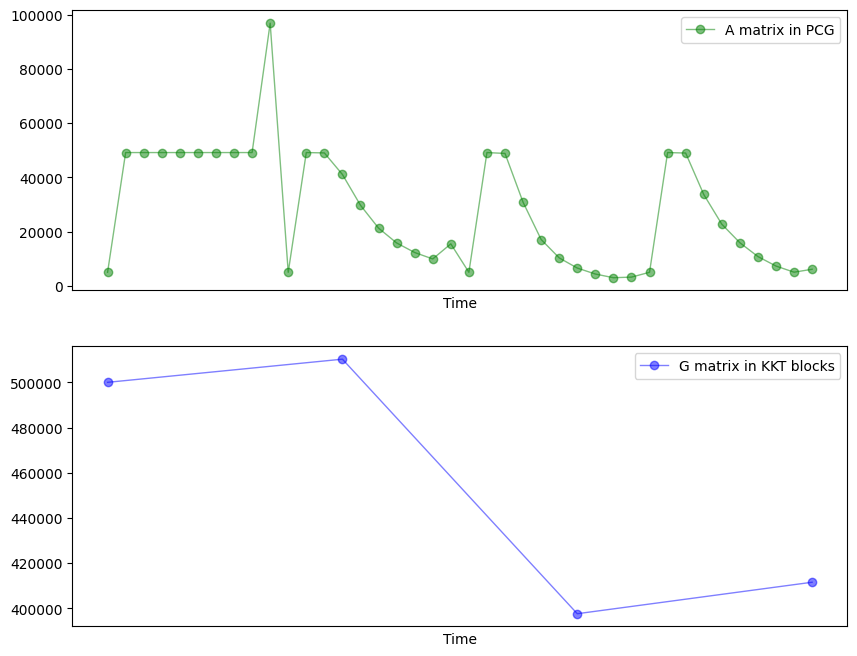

In [14]:
inversions['cond']=inversions['Op1'].apply(np.linalg.cond)
A=inversions[inversions['func_0']=='compute_preconditioner']
G=inversions[inversions['func_0']=='solveKKTSystem_Schur']
plt.figure(figsize=(5, 3))
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# plt.plot(range(len(A)), A['cond'], marker='o', color='green', linestyle='-', linewidth=1, alpha=0.5, label="A matrix in PCG")
ax1.plot(range(len(A)), A['cond'], marker='o', color='green', linestyle='-', linewidth=1, alpha=0.5, label="A matrix in PCG")

ax2.plot(range(len(G)), G['cond'], marker='o', color='blue', linestyle='-', linewidth=1, alpha=0.5, label="G matrix in KKT blocks")

# plt.title('Cond Value for matrix inverted' )
ax1.set_xlabel('Time') 
ax2.set_xlabel('Time') 
ax1.set_xticks([])
ax2.set_xticks([])
ax1.legend()
ax2.legend()


In [28]:
print(*A['Shape1'].unique())

(4, 4)


In [41]:
def plot_matrix_from_df(df, name):

    matrix_shape = df['Shape1'].unique()[0]
    sum_matrix = np.zeros(matrix_shape)
    count_matrix = np.zeros(matrix_shape)
    min_matrix = np.full(matrix_shape, np.inf)
    max_matrix = np.full(matrix_shape, -np.inf)
    
    for matrix in df['Op1']:
        sum_matrix += matrix
        count_matrix += 1
        min_matrix = np.minimum(min_matrix, matrix)
        max_matrix = np.maximum(max_matrix, matrix)
    
    average_matrix = sum_matrix / count_matrix
    range_matrix = max_matrix - min_matrix

    if matrix_shape[0] > 10:
        figsize = (16, 6) 
    else:
        figsize = (8,3)  
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    sns.heatmap(average_matrix, annot=True, fmt=".2f", cmap='viridis', ax=axes[0])
    axes[0].set_title(f'{name} matrix, average ')
    
    sns.heatmap(range_matrix, annot=True, fmt=".2f", cmap='viridis', ax=axes[1])
    axes[1].set_title(f'{name} matrix, range ')
    plt.tight_layout()
    plt.show()


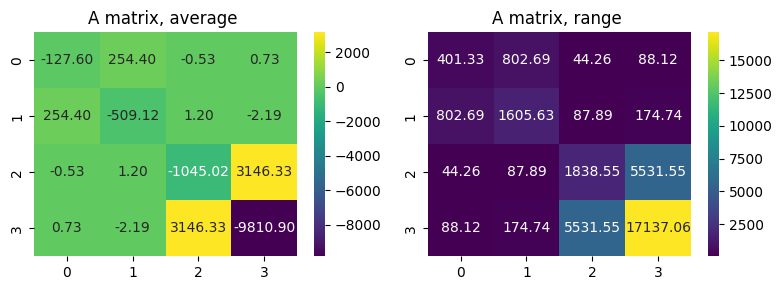

In [42]:
plot_matrix_from_df(A, 'A')

## Classify operations

### Number op operations per function

## Define cost based on operations

In [38]:

def assign_cost_to_op(op):
    operator = op['Operator']
    
    def get_shape(operand):
        if operand is None or np.isnan(operand).any():
            return (0, 0)
        if isinstance(operand, np.ndarray):
            if operand.ndim == 1:
                return (1, operand.shape[0])  # Treat 1D array as a row vector
            return operand.shape
        return (0, 0)

    shape1 = get_shape(op['Op1'])
    shape2 = get_shape(op['Op2'])

    (n, m) = shape1
    (o, p) = shape2

    if operator == 'mul':
        return n * p * (2 * m - 1)
    elif operator == 'sub':
        return n * m
    elif operator == 'add':
        return n * m
    elif operator == 'invert_matrix':
        return n ** 3
    elif operator == 'transpose':
        return n * m
    elif operator == 'reshape':
        return 1
    elif operator == 'vstack':
        return (n + o) * m
    elif operator == 'hstack':
        return (m + p) * n
    else:
        return 0

new_op['cost']= new_op.apply(assign_cost_to_op, axis=1) 


/tmp/ipykernel_15611/1853839601.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')


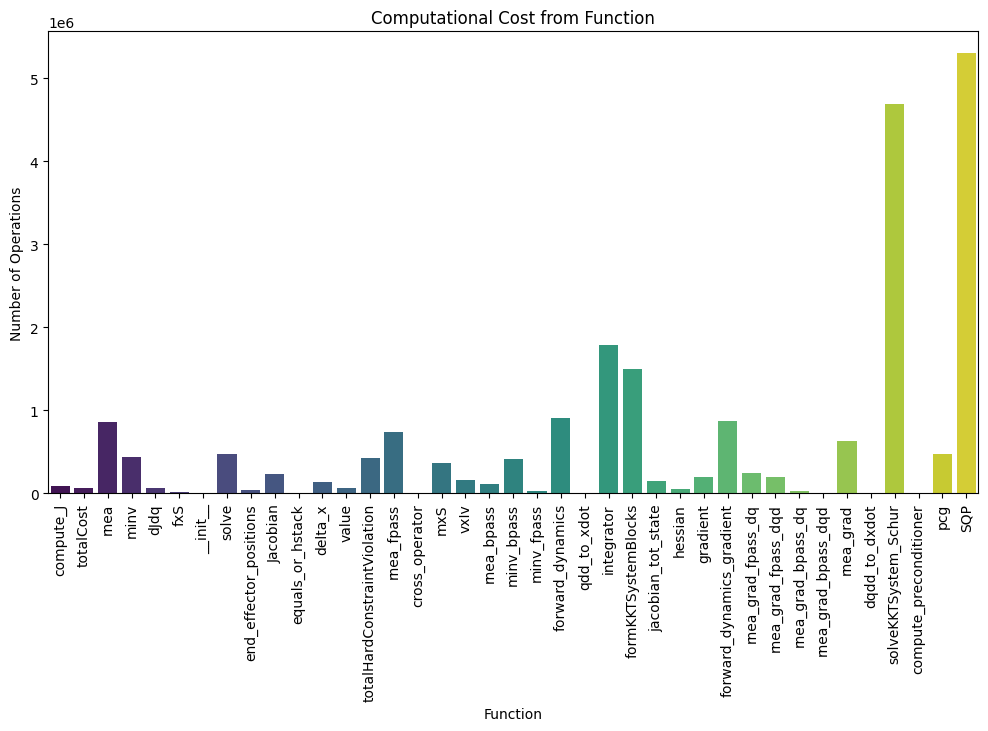

In [39]:
n_op_per_function=[]
for f in unique_functions(new_op):
    function_df=filter_by_function(new_op, f)
    n_op_per_function.append({'function': f, 'n_operations': function_df['cost'].sum()})


n_op_df = pd.DataFrame(n_op_per_function)
plt.figure(figsize=(12, 6))
sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')
plt.xlabel('Function')
plt.ylabel('Number of Operations')
plt.title('Computational Cost from Function')
plt.xticks(rotation=90)
plt.show()

In [45]:
def composite_bar_plot(main_bar_plot, internal_bar_plots, title):
    main_df = pd.DataFrame(main_bar_plot)
    
    plt.figure(figsize=(8, 6))
    palette = sns.color_palette("deep", len(main_bar_plot))
    main_bar = sns.barplot(data=main_df, x='function', y='n_operations', palette=palette)
    
    positions = main_bar.patches
    for i, pos in enumerate(positions):
        x = pos.get_x()
        width = pos.get_width()
        y = pos.get_y()
        height = pos.get_height()
        internal_df = pd.DataFrame(internal_bar_plots[i])
        internal_palette = sns.light_palette(palette[i], n_colors=len(internal_df)+1)
        for j, internal_row in internal_df.iterrows():
            internal_x = x +0.2 + j * (width / len(internal_df))
            internal_width = width / len(internal_df) - 0.02
            internal_height = internal_row['n_operations'] / main_df.iloc[i]['n_operations'] * height
            plt.bar(internal_x, internal_height, width=internal_width, bottom=y, label=internal_row['function'], color=internal_palette[j+1], edgecolor='black', linewidth=2)
    plt.xlabel('')
    plt.ylabel('Cost')
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()


/tmp/ipykernel_15611/784529747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')


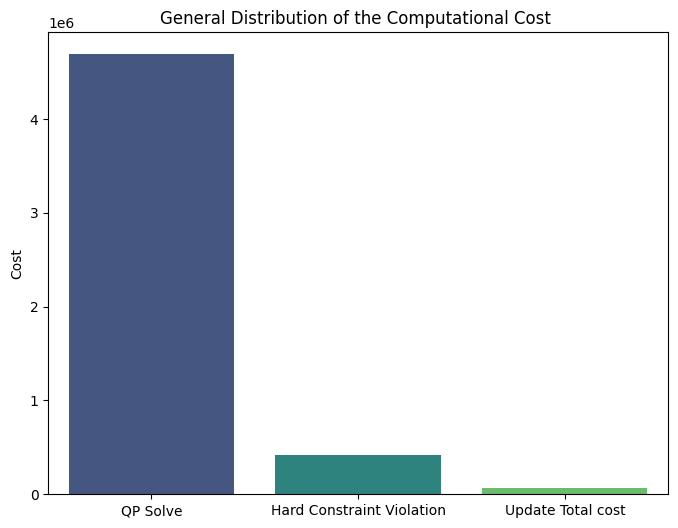

In [40]:

n_op_per_function=[]
KKT_df=filter_by_function(new_op, 'solveKKTSystem_Schur')
constraint_df=filter_by_function(new_op, 'totalHardConstraintViolation')
totcost_df=filter_by_function(new_op, 'totalCost')
integrator_df=filter_by_function(new_op, 'integrator')
sqp_internal_df= new_op[new_op['func_0']=='SQP']

KKT_blocks_df=filter_by_function(KKT_df, 'formKKTSystemBlocks')
pcg_df=pd.concat((filter_by_function(KKT_df, 'pcg'), filter_by_function(new_op, 'solve'),filter_by_function(new_op, 'compute_preconditioner') ))
other_KKT_df=KKT_df[KKT_df['func_0']=='solveKKTSystem_Schur']

n_op_per_function=[{'function': 'QP Solve', 'n_operations': KKT_df['cost'].sum()},
{'function': 'Hard Constraint Violation', 'n_operations': constraint_df['cost'].sum()},
{'function': 'Update Total cost', 'n_operations': totcost_df['cost'].sum()}]

n_op_df = pd.DataFrame(n_op_per_function)
plt.figure(figsize=(8, 6))
sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')
plt.xlabel('')
plt.ylabel('Cost')
plt.title('General Distribution of the Computational Cost ')
plt.show()

/tmp/ipykernel_15611/1920738519.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')


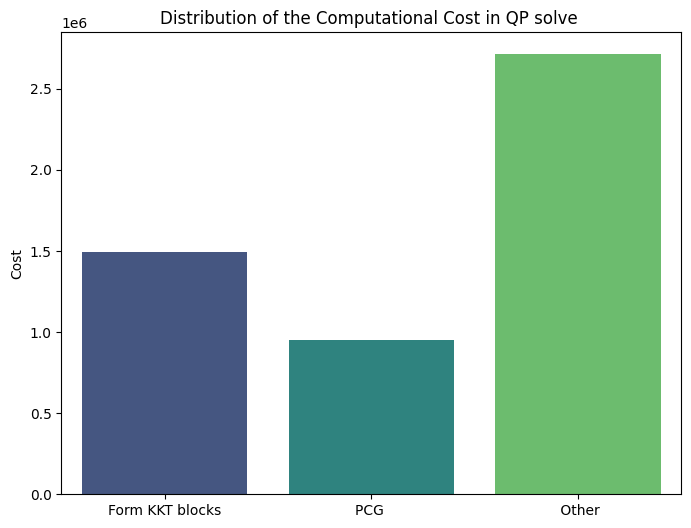

In [42]:

n_op_per_function=[{'function': 'Form KKT blocks', 'n_operations': KKT_blocks_df['cost'].sum()},
{'function': 'PCG ', 'n_operations': pcg_df['cost'].sum()},
{'function': ' Other', 'n_operations': other_KKT_df['cost'].sum()}]

n_op_df = pd.DataFrame(n_op_per_function)
plt.figure(figsize=(8, 6))
sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')
plt.xlabel('')
plt.ylabel('Cost')
plt.title('Distribution of the Computational Cost in QP solve ')
plt.show()


/tmp/ipykernel_15611/2630005473.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  main_bar = sns.barplot(data=main_df, x='function', y='n_operations', palette=palette)


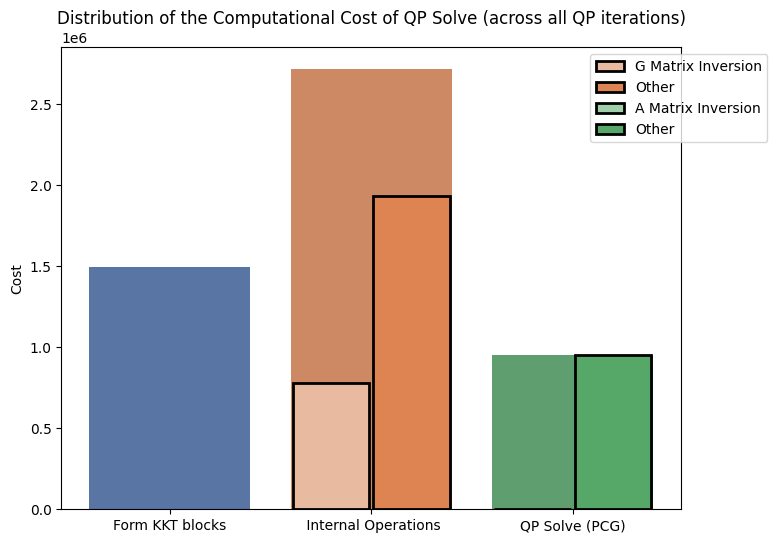

In [51]:
invert_KKT_df=other_KKT_df[other_KKT_df['Operator']=='invert_matrix']
others_df=filter_out_by_index(other_KKT_df,invert_KKT_df.index)

invert_PCG_df=pcg_df[pcg_df['Operator']=='invert_matrix']
others_pcg_df=filter_out_by_index(pcg_df,invert_PCG_df.index)

main_bar=[{'function': 'Form KKT blocks', 'n_operations': KKT_blocks_df['cost'].sum()},
{'function': ' Internal Operations', 'n_operations': other_KKT_df['cost'].sum()},
{'function': 'QP Solve (PCG)', 'n_operations': pcg_df['cost'].sum()}]

internal_bar_1=[{'function': 'G Matrix Inversion', 'n_operations': invert_KKT_df['cost'].sum()},
{'function': 'Other', 'n_operations': others_df['cost'].sum()}]

internal_bar_2=[{'function': 'A Matrix Inversion', 'n_operations': invert_PCG_df['cost'].sum()},
{'function': 'Other', 'n_operations': others_pcg_df['cost'].sum()}]

internal_bars=[[],internal_bar_1, internal_bar_2]
composite_bar_plot(main_bar, internal_bars, 'Distribution of the Computational Cost of QP Solve (across all QP iterations)')


,line_0,Operator,i,N_calls,tot_cost,cost_per_call
0,396,mul,1,4,1067200,266800
1,392,invert_matrix,1,4,780448,195112
2,396,mul,2,4,736000,184000
3,397,mul,1,4,26680,6670
4,418,mul,1,4,26680,6670
5,397,mul,2,4,18400,4600
6,417,mul,1,4,18328,4582
7,390,add,1,4,13456,3364
8,396,transpose,1,4,9280,2320
9,417,transpose,1,4,9280,2320


/tmp/ipykernel_15611/3932809839.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_cost.index, y='tot_cost', data=highest_cost, palette='viridis')


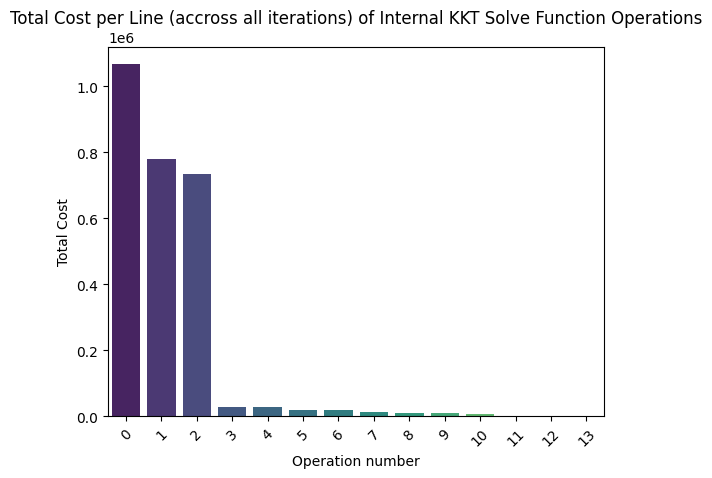

In [53]:
grouped = other_KKT_df.groupby(['line_0', 'Operator', 'i']).agg({
    'cost': 'sum', 
}).reset_index()

grouped['N_calls'] = other_KKT_df.groupby(['line_0', 'Operator', 'i']).size().values
grouped['tot_cost']= grouped['cost']
grouped['cost_per_call']= (grouped['cost']/grouped['N_calls']).astype(int)
grouped=grouped.drop(columns='cost')
highest_cost = grouped.sort_values(by='tot_cost', ascending=False).reset_index().drop(columns='index')
display(highest_cost)
sns.barplot(x=highest_cost.index, y='tot_cost', data=highest_cost, palette='viridis')
plt.xlabel('Operation number')
plt.ylabel('Total Cost')
plt.title('Total Cost per Line (accross all iterations) of Internal KKT Solve Function Operations')
plt.xticks(rotation=45)
plt.show()


In [ ]:
line_396= other_KKT_df[other_KKT_df['line_0']==396].reset_index().loc[0]
line_392= other_KKT_df[other_KKT_df['line_0']==392].reset_index().loc[0]

print(retrieve_line_as_string(line_396))
print(retrieve_line_as_string(line_392))



            S = BR-(C@(invG@C.transpose()))

            invG = matrix_.invert_matrix(G)



736


/tmp/ipykernel_15611/29699787.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')


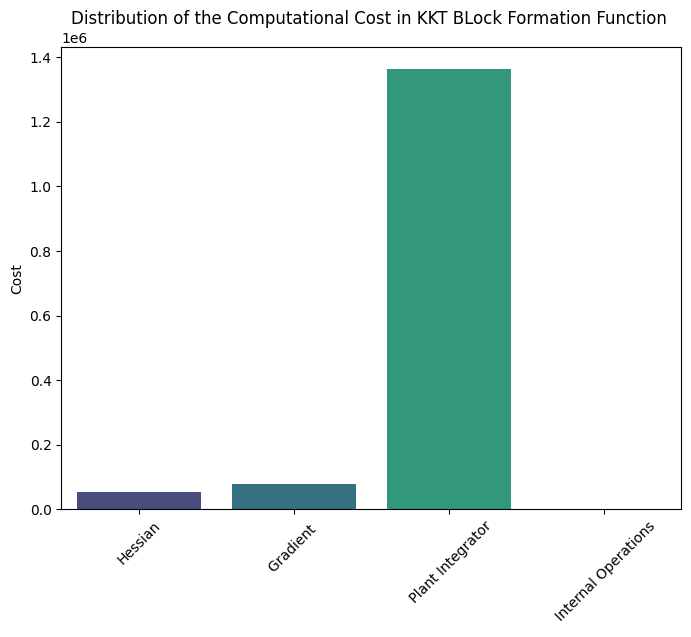

In [56]:
hess_df=filter_by_function(KKT_blocks_df,'hessian')
grad_df=filter_by_function(KKT_blocks_df,'gradient')
integrator_df=filter_by_function(KKT_blocks_df,'integrator')
internal_KKT_block_df=KKT_blocks_df[KKT_blocks_df['func_0']=='formKKTSystemBlocks']

print( internal_KKT_block_df['cost'].sum())
n_op_per_function=[{'function': 'Hessian', 'n_operations': hess_df['cost'].sum()},
{'function': 'Gradient ', 'n_operations': grad_df['cost'].sum()},
{'function': ' Plant Integrator', 'n_operations': integrator_df['cost'].sum()},
{'function': ' Internal Operations', 'n_operations': internal_KKT_block_df['cost'].sum()}]

n_op_df = pd.DataFrame(n_op_per_function)
plt.figure(figsize=(8, 6))
sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')
plt.xlabel('')
plt.ylabel('Cost')
plt.title('Distribution of the Computational Cost in KKT BLock Formation Function ')
plt.xticks(rotation=45)

plt.show()

In [ ]:
def bar_plot(n_op_per_function, title):
    n_op_df = pd.DataFrame(n_op_per_function)
    plt.figure(figsize=(8, 6))
    sns.barplot(data=n_op_df, x='function', y='n_operations', palette='viridis')
    plt.xlabel('')
    plt.ylabel('Cost')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipykernel_5643/3648227623.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  main_bar = sns.barplot(data=main_df, x='function', y='n_operations', palette=palette)


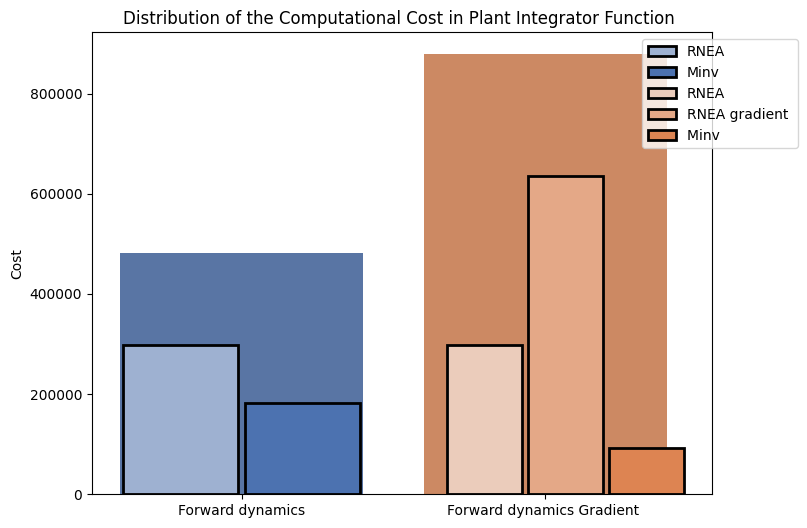

In [ ]:


fd_df=filter_by_function(integrator_df,'forward_dynamics')
fdg_df=filter_by_function(integrator_df,'forward_dynamics_gradient')
internal_integrator_df=integrator_df[integrator_df['func_0']=='integrator']

rnea_fd_df=filter_by_function(fd_df,'rnea')
minv_fd_df=filter_by_function(fd_df,'minv')
internal_fd_df=fd_df[fd_df['func_0']=='forward_dynamics']

rnea_fdg_df=filter_by_function(fdg_df,'rnea')
rneag_fdg_df=filter_by_function(fdg_df,'rnea_grad')
minv_fdg_df=filter_by_function(fdg_df,'minv')
internal_fdg_df=fdg_df[fdg_df['func_0']=='forward_dynamics_gradient']


main_bar_plot=[{'function': 'Forward dynamics', 'n_operations': fd_df['cost'].sum()},
{'function': 'Forward dynamics Gradient ', 'n_operations': fdg_df['cost'].sum()}]

internal_bar_plot_1=[{'function': 'RNEA', 'n_operations': rnea_fd_df['cost'].sum()},
{'function': 'Minv', 'n_operations': minv_fd_df['cost'].sum()}]

internal_bar_plot_2=[{'function': 'RNEA', 'n_operations': rnea_fdg_df['cost'].sum()},
{'function': 'RNEA gradient ', 'n_operations': rneag_fdg_df['cost'].sum()},
{'function': 'Minv ', 'n_operations': minv_fdg_df['cost'].sum()}]

internal_bar_plots = [internal_bar_plot_1, internal_bar_plot_2, []] 

composite_bar_plot(main_bar_plot, internal_bar_plots, 'Distribution of the Computational Cost in Plant Integrator Function ')

/tmp/ipykernel_15611/1722773521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  main_bar = sns.barplot(data=main_df, x='function', y='n_operations', palette=palette)


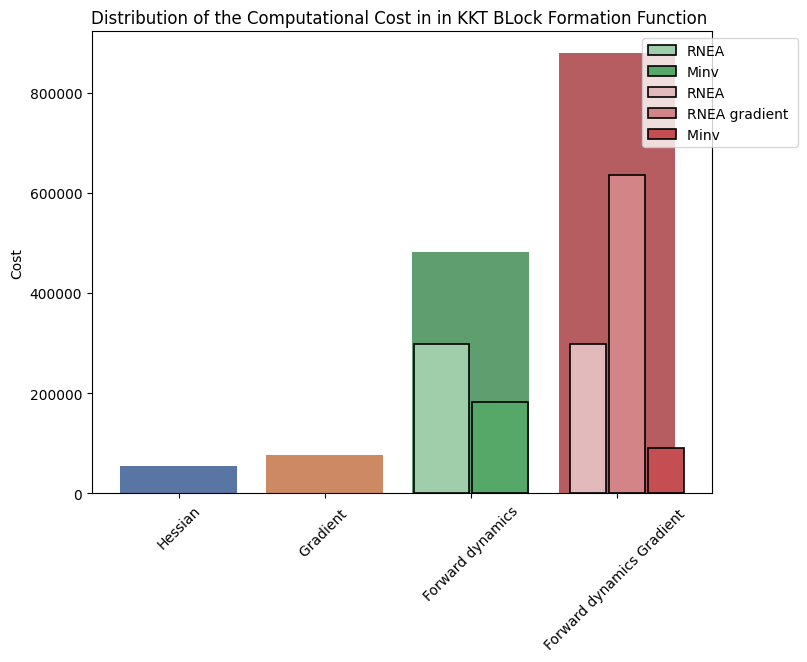

In [59]:

def composite_bar_plot(main_bar_plot, internal_bar_plots, title):
    main_df = pd.DataFrame(main_bar_plot)
    
    plt.figure(figsize=(8, 6))
    palette = sns.color_palette("deep", len(main_bar_plot))
    main_bar = sns.barplot(data=main_df, x='function', y='n_operations', palette=palette)
    
    positions = main_bar.patches
    for i, pos in enumerate(positions):
        x = pos.get_x()
        width = pos.get_width()
        y = pos.get_y()
        height = pos.get_height()
        internal_df = pd.DataFrame(internal_bar_plots[i])
        internal_palette = sns.light_palette(palette[i], n_colors=len(internal_df)+1)
        for j, internal_row in internal_df.iterrows():
            internal_x = x +0.2 + j * (width / len(internal_df))
            internal_width = width / len(internal_df) - 0.02
            internal_height = internal_row['n_operations'] / main_df.iloc[i]['n_operations'] * height
            plt.bar(internal_x, internal_height, width=internal_width, bottom=y, label=internal_row['function'], color=internal_palette[j+1], edgecolor='black', linewidth=1.2)
    plt.xlabel('')
    plt.ylabel('Cost')
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.xticks(rotation=45)
    plt.show()

fd_df=filter_by_function(integrator_df,'forward_dynamics')
fdg_df=filter_by_function(integrator_df,'forward_dynamics_gradient')
internal_integrator_df=integrator_df[integrator_df['func_0']=='integrator']

rnea_fd_df=filter_by_function(fd_df,'rnea')
minv_fd_df=filter_by_function(fd_df,'minv')
internal_fd_df=fd_df[fd_df['func_0']=='forward_dynamics']

rnea_fdg_df=filter_by_function(fdg_df,'rnea')
rneag_fdg_df=filter_by_function(fdg_df,'rnea_grad')
minv_fdg_df=filter_by_function(fdg_df,'minv')
internal_fdg_df=fdg_df[fdg_df['func_0']=='forward_dynamics_gradient']

main_bar_plot=[{'function': 'Hessian', 'n_operations': hess_df['cost'].sum()},
{'function': 'Gradient ', 'n_operations': grad_df['cost'].sum()},
{'function': 'Forward dynamics', 'n_operations': fd_df['cost'].sum()},
{'function': 'Forward dynamics Gradient ', 'n_operations': fdg_df['cost'].sum()}]

internal_bar_plot_1=[{'function': 'RNEA', 'n_operations': rnea_fd_df['cost'].sum()},
{'function': 'Minv', 'n_operations': minv_fd_df['cost'].sum()}]

internal_bar_plot_2=[{'function': 'RNEA', 'n_operations': rnea_fdg_df['cost'].sum()},
{'function': 'RNEA gradient ', 'n_operations': rneag_fdg_df['cost'].sum()},
{'function': 'Minv ', 'n_operations': minv_fdg_df['cost'].sum()}]

internal_bar_plots = [[],[],internal_bar_plot_1, internal_bar_plot_2] 

composite_bar_plot(main_bar_plot, internal_bar_plots, 'Distribution of the Computational Cost in in KKT BLock Formation Function ')

In [ ]:
to_remove=new_op[new_op['func_0']=='cross_operator'].index
new_op=new_op.drop(to_remove)
# display(new_op['Operator','Op1', 'Op2', 'QP Iteration', 'Soft_Iteration', 'File_O', 'function_0', 'line_0','File_1', 'function_1','File_2', 'function_2', 'Shape1','Shape2', 'Variable'])
display(new_op)
# print(new_op['line_8'].unique())
# display(new_op[new_op['line_8']==594.])

,Operator,Op1,Op2,QP Iteration,Soft Iteration,File_0,func_0,line_0,File_1,func_1,...,func_7,line_7,File_8,func_8,line_8,File_9,func_9,line_9,Shape1,Shape2
0,mul,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], ...",0,0,RBDReference.py,end_effector_positions,132,TrajoptCost.py,delta_x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4, 4)","(4, 4)"
1,mul,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], ...",0,0,RBDReference.py,end_effector_positions,132,TrajoptCost.py,delta_x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4, 4)","(4, 4)"
2,mul,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], [...","[[[[[0]]]], [[[[1]]]], [[[[0]]]], [[[[1]]]]]",0,0,RBDReference.py,end_effector_positions,133,TrajoptCost.py,delta_x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4, 4)","(4, 1)"
3,mul,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[-0.0, -1.0, 0.0, 0.0], [1.0, -0.0, 0.0, 0.0]...",0,0,RBDReference.py,Jacobian,358,TrajoptCost.py,compute_J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4, 4)","(4, 4)"
4,mul,"[[0.0, -1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], ...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], ...",0,0,RBDReference.py,Jacobian,358,TrajoptCost.py,compute_J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4, 4)","(4, 4)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20473,transpose,"[0.08137564947743448, 0.06505657639502815, 0.0...",None,3,0,TrajoptCost.py,gradient,440,TrajoptMPCReference.py,SQP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4,)",()
20474,mul,"[0.08137564947743448, 0.06505657639502815, 0.0...","[[100.0, 0.0, 0.0, 0.0], [0.0, 100.0, 0.0, 0.0...",3,0,TrajoptCost.py,gradient,440,TrajoptMPCReference.py,SQP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4,)","(4, 4)"
20475,mul,"[8.137564947743448, 6.505657639502815, 1.11381...","[[-1.5650565763950282, -0.569753575389212, 0.0...",3,0,TrajoptCost.py,gradient,440,TrajoptMPCReference.py,SQP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4,)","(4, 4)"
20476,reshape,"[-18.71628283973491, -9.983737734134776, -1.91...",None,3,0,TrajoptCost.py,gradient,440,TrajoptMPCReference.py,SQP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(4,)",()
